# Numerical Exercise 06

In [12]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import math

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']



## Intro
In Statistical Mechanics the one-dimensional (1D) Ising Model is exactly resoluble. The Hamiltonian for a system of N spins with nearest neighbors interaction is given by (in the following I will assume units such that $\mu_B=1$ and $k_B=1$):

$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$

where $\{ s_i \}_{i=1,N}$ are spin variables taking values in $\{-1;1\}$, $J>0$ (ferromagnetic model),and with the assumption $s_{N+1} = s_{1}$.

The partition function for $N$ spins, $Z$, can be exactly computed and it turns out to be:

$$
Z=\sum_{\{ s_i \}} \exp \left( -\beta H\right) = \lambda_1^N + \lambda_2^N
$$

where
$\lambda_{1,2} = 
e^{\beta J} 
\cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$, 
and where $\beta=\frac{1}{k_b T} = \frac{1}{T}$.
Once the partition function has been computed, the Helmholtz free energy is readly obtained as $A = -k_B T \ln Z$. All the thermodynamic quantities of interest can be deduced from $A$ or, equivalently, from $Z$:

- the **Internal Energy** per spin (with $h=0$):

$$
\frac{U(N,T)}{N} = -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

- the **Heat Capacity** (with $h=0$):

$$
\frac{C(N,T)}{N} = k_B (\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} - N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}
$$

- The **magnetization** (with $h \not= 0$):

Note that with $h=0$ the magnetization $M(N,T,h=0)=\langle \sum_{i=1,N}s_i \rangle =0$ because in 1D we cannot have a (ferromagnetic) phase transition in absence of an external magnetic field.

$$
M(N,T,h) = \sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} = \left\langle \sum_{i=1,N}s_i \right\rangle
$$

The exact formula from $M(N,T,h) = k_B T \dfrac{\partial \ln Z}{\partial h}$ is:
$$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$

- The **magnetic susceptibility** (with $h=0$):

$$
\chi(N,T) \underset{h=0}= \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

## Assignment
### Exercise 06.1

Complete the NSL_simulator code to simulate a 1D Ising model with the Gibbs sampling algorithm (the Metropolis algorithm is already implemented) to sample the Boltzmann's weight $p(\{ s_i \}) = \exp(-\beta H)/Z$. Verify the possibility to restart from a previous spin configuration.

The code already computes the internal energy: $U(N,T) = \langle H \rangle$. Add the calculation of $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ and compute:
1. $U(N,T) = \langle H \rangle_{h=0}$
2. $C(N,T) = k_B \beta^2 (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$ 
3. $\chi(N,T) = \beta \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$
4. $M(N,T,h=0.02)= \langle \sum_{i=1,N}s_i \rangle_{h=0.02}$

as a function of $T$ in the range $\left[0.5;2.0\right]$ for a system of $N=50$ spins with $J=1$.

As usual, use data blocking and give an estimate of the statistical uncertainties.

- Show pictures of your estimations of $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h=0.02)$ and their uncertainties obtained with a large number of *MC steps* (e.g. $M\ge 10^5$) compared with the exact curves. In the same picture show your results obtained with both sampling methods, Metropolis and Gibbs.

A Monte Carlo step will consist in trying to flip one time all the spins of the system. Do not forget to equilibrate your simulations and to use blocking average with blocks large enough.

---

## Resolution

### Some more thermodynamics
The following exercises will verge on the implememtaion of the Metropolis algorithm, and for this exercise also the Gibbs sampling algorithm. To use this algorthms we need to put the system in a canonical ensemble, which means that the system is in contact with a heat bath at a fixed temperature $T$. The energy is no longer conserved, and this type is also called NVT ensemble (number of particles - volume - temperature) The probability of finding the system in a certain state is given by the Boltzmann weight. 

#### Sampling methods
Given a probability distribution $p(x)$, the Metropolis algorithm gives a way to sample from this distribution. The algorithm is as follows:
1. Start from a random configuration $x$
2. Propose a new configuration $y$
3. Compute the acceptance probability $A(x|y) = \min \left[1, \frac{p(y)}{p(x)}\right]$
4. Generate a random number $r$ from a uniform distribution in $[0,1]$
5. If $r < A(x | y)$ accept the move, otherwise reject it
6. Repeat from step 2

For the Ising model the proposed move consist in chosing a particle and proposing a spin flip. The probability to sample from is give by the Boltzmann weight:
$$
p(x) = \frac{e^{-\beta H(x)}}{Z}
$$
where $Z$ is the partition function. But for Metropolis we do not need to compute $Z$, since it cancels out in the acceptance probability. The acceptance probability is then:
$$
A(x|y) = \min \left[1, \frac{e^{-\beta E(y)}}{e^{-\beta E(x)}}\right] = \min \left[1, e^{-\beta \Delta E}\right]
$$
where $\Delta E = E(y) - E(x)$.

The Gibbs sampling method is a special case of the Metropolis algorithm, called also "heat bath" algorithm. By using the conditional probability as the acceptance probability, every move is accepted.
1. Start from a random configuration ${x_1, x_2}$, keeping fixed $x_2$, and sample $y_1$ from the conditional probability $p(x_1 | x_2)$
2. From the new configuration ${y_1, x_2}$, keeping fixed $y_1$, and sample $y_2$ from the conditional probability $p(x_2 | y_1)$
3. Repeat from step 2
This algorithm is particularly powerful when the conditional probabilities are easy to sample from.

For the Ising model the steps are chosing a random particle and proposing a new spin value independetly from the original one. The conditional probability is:
$$
p(s_i | \{s_j\}_{j \neq i}) = \frac{e^{-\beta H(s_i, \{s_j\}_{j \neq i})}}{e^{-\beta H(s_i, \{s_j\}_{j \neq i})} + e^{\beta H(-s_i, \{s_j\}_{j \neq i})}}
$$
which simplifies to:
$$
p(s_i = \pm 1 | \{s_j\}_{j \neq i}) = \frac{1}{1 + e^{\mp 2\beta E(s_i, \{s_j\}_{j \neq i})}}
$$

### Code
#### Sampling
The Metropolis algortihm is already implemented in the code, remains to implement the Gibbs sampling. The code is:
```cpp
void System :: move(int i){ // Propose a MC move for particle i
  if(_sim_type == 3){ //Gibbs sampler for Ising
    // Calculates the Boltzmann probability of flipping the spin of particle i
    // Remember periodic boundary conditions, the spin of the neighbors is accessed with the pbc method
    double p_up = -2.0 * _beta * (_J * ((_particle(this->pbc(i-1)).getspin() + _particle(this->pbc(i+1)).getspin()) + _H));
    p_up = 1.0 / (1.0 + exp(p_up));
    // Wont use the flip method: a value of spin is set independently of the previous one 
    if(_rnd.Rannyu() < p_up){
      _particle(i).setspin(1);
    } else {
      _particle(i).setspin(-1);
    }
    _naccepted++; // always accepted
  } else {           // M(RT)^2
    /* ... */
    /* other code */
    /* ... */
  }
  return;
}
```

#### Observables
The implementaiont of the magnetic susceptibility is straightforward, as well as the magnetization. The heat capacity is a bit more complicated, as it requires the computation of the square of the energy. The code is:
```cpp
  // MAGNETIZATION /////////////////////////////////////////////////////////////
  if (_measure_magnet){
    for(int i{0}; i<_npart; i++){
      magnetization += double(_particle(i).getspin());
    }
    _measurement(_index_magnet) = magnetization;
  }
  // SPECIFIC HEAT /////////////////////////////////////////////////////////////
  if (_measure_cv){
    double current_H{_measurement(_index_tenergy)*double(_npart)};
    current_H *= current_H;
    _measurement(_index_cv) = current_H;
  }
  // SUSCEPTIBILITY ////////////////////////////////////////////////////////////
  if (_measure_chi){
    chi_temp = _measurement(_index_magnet)*_measurement(_index_magnet)*_beta;
    chi_temp /= double(_npart);
    _measurement(_index_chi) = chi_temp;
  }
```
while in the `average` method the heat capacity is computed as:
```cpp
if(_measure_cv){ // there must be a better way: prepare _block_av(_index_cv) such as when divided per _n_steps gives the correct avg
    _block_av(_index_cv) -= pow(_block_av(_index_tenergy)*double(_npart), 2)/double(_nsteps);
    _block_av(_index_cv) *= _beta*_beta;
}
```

Below are shown the results of the simulations.



In [13]:
temp, m_energy, m_energy_err, m_capacity, m_capacity_err, m_chi,m_chi_err = np.loadtxt("../data/ex06_metro_h0.dat", unpack=True, usecols=(0,2,3,4,5,6,7), skiprows=1)
g_energy, g_energy_err, g_capacity, g_capacity_err, g_chi,g_chi_err = np.loadtxt("../data/ex06_gibbs_h0.dat", unpack=True, usecols=(2,3,4,5,6,7), skiprows=1)
m_magnet, m_magnet_err = np.loadtxt("../data/ex06_metro_h002.dat", unpack=True, usecols=(2,3), skiprows=1)
g_magnet, g_magnet_err = np.loadtxt("../data/ex06_gibbs_h002.dat", unpack=True, usecols=(2,3), skiprows=1)
T = np.linspace(0.2,3.0,100)


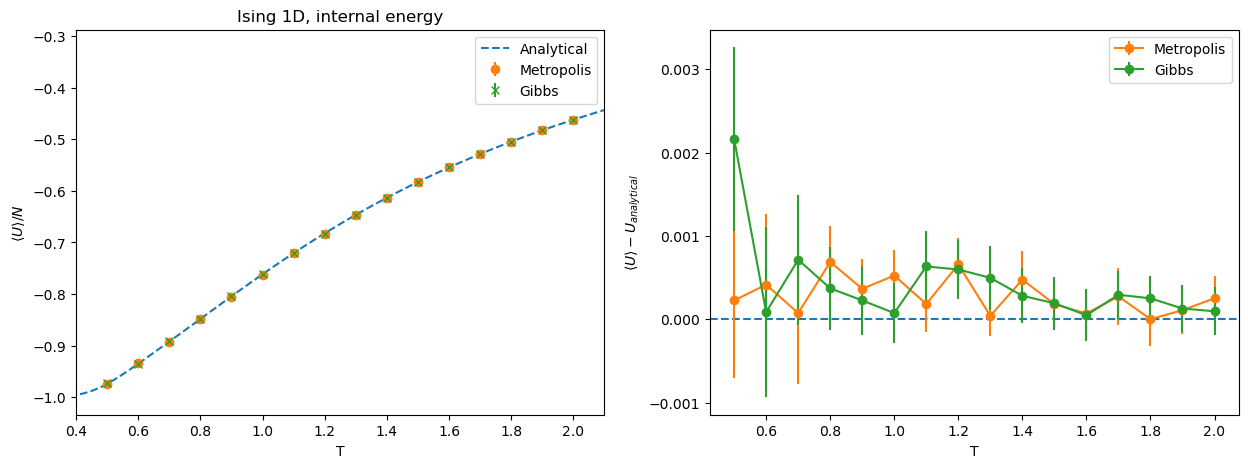

In [14]:
def energy(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return -J*( th + ch*thN )/( 1 + thN )

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(T, energy(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_energy, yerr=m_energy_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_energy, yerr=g_energy_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, internal energy')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel(r'$\langle U \rangle / N$')
plt.legend()

plt.subplot(1, 2, 2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, abs(m_energy-energy(temp)), yerr=m_energy_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, abs(g_energy-energy(temp)), yerr=g_energy_err, label='Gibbs', color=colors[2], marker='o')
plt.xlabel('T')
plt.ylabel(r"$\langle U \rangle - U_{analytical}$")
plt.legend()
plt.show()

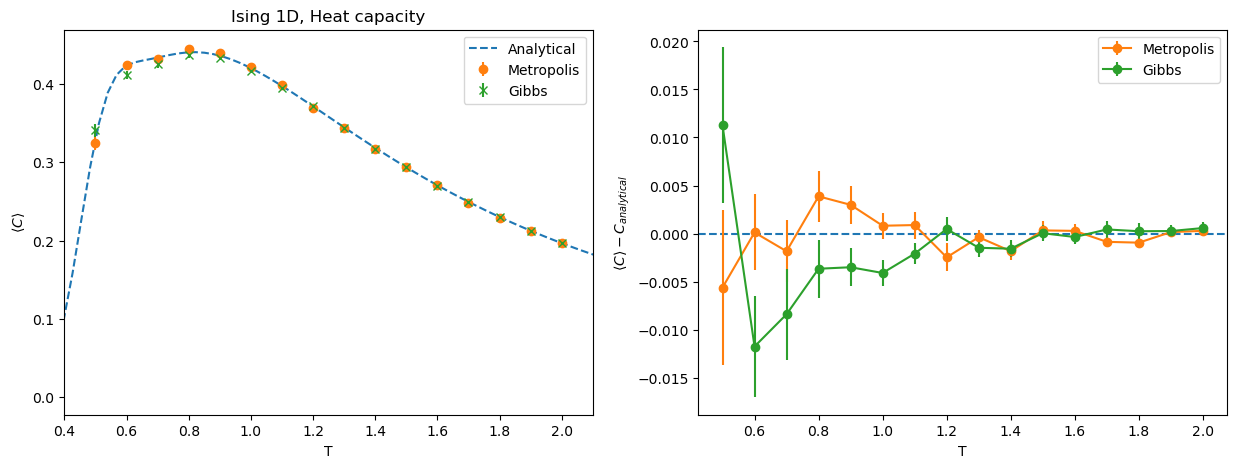

In [15]:
def capacity(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return ((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, capacity(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_capacity, yerr=m_capacity_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_capacity, yerr=g_capacity_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, Heat capacity')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel(r'$\langle C \rangle$')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_capacity-capacity(temp), yerr=m_capacity_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_capacity-capacity(temp), yerr=g_capacity_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.xlabel('T')
plt.ylabel(r'$\langle C \rangle - C_{analytical}$')
plt.show()


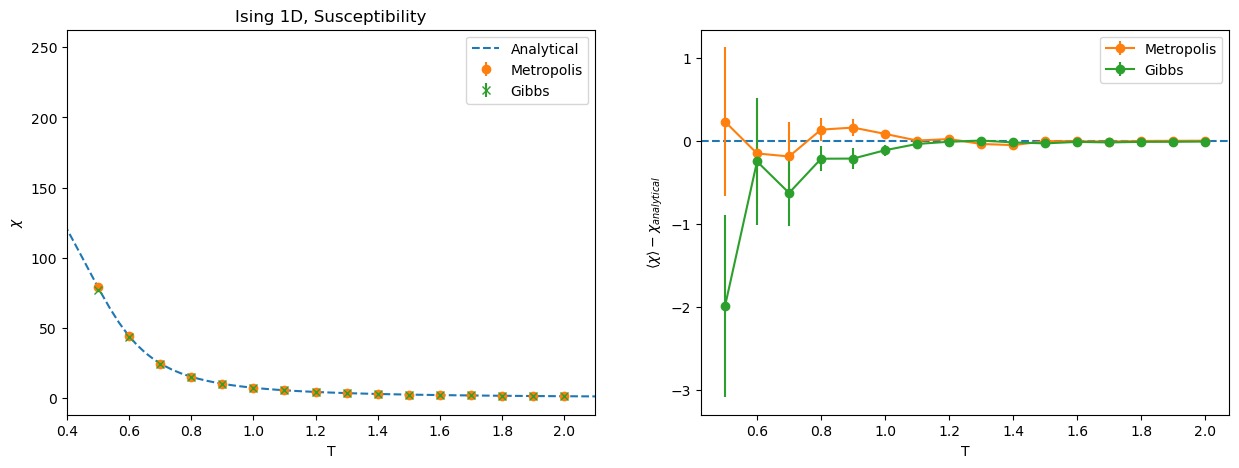

In [16]:
def susceptibility(temp):
    beta = 1/temp
    J = 1.0
    Ns = 50
    th = np.tanh(J/temp)
    thN= th**Ns
    ch = 1/th
    return beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, susceptibility(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_chi, yerr=m_chi_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_chi, yerr=g_chi_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, Susceptibility')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel(r'$\chi$')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_chi-susceptibility(temp), yerr=m_chi_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_chi-susceptibility(temp), yerr=g_chi_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.xlabel('T')
plt.ylabel(r'$\langle \chi \rangle - \chi_{analytical}$')
plt.show()



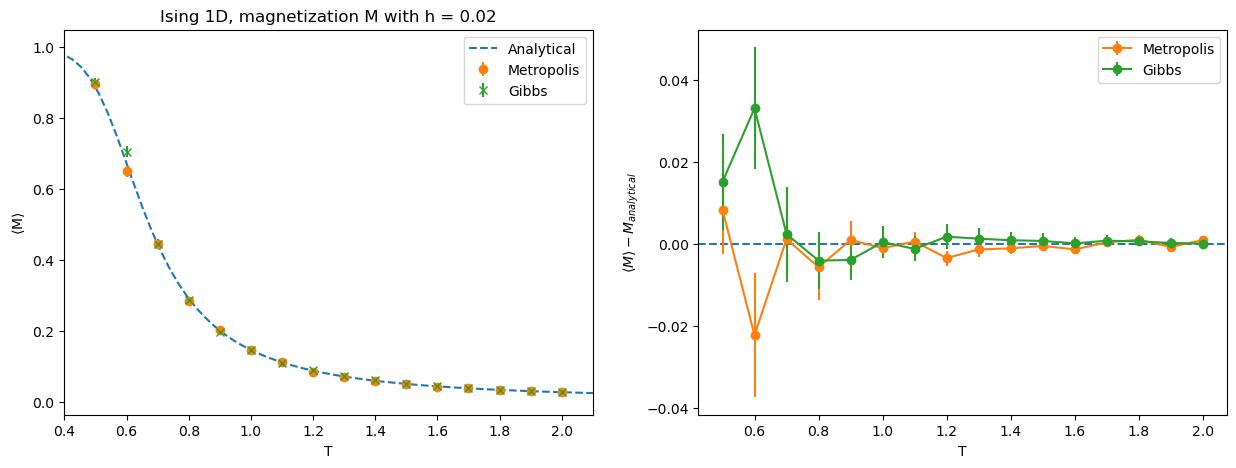

In [17]:
def magnetization(temp):
    h=0.02 #external field
    b = 1/temp
    J=1.0
    Ns=50
    l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
    Z = l1**Ns + l2**Ns
    return (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)


fig = plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.plot(T, magnetization(T), label='Analytical', color=colors[0], linestyle='--')
plt.errorbar(temp, m_magnet, yerr=m_magnet_err, label='Metropolis', color=colors[1], marker='o', linestyle='none')
plt.errorbar(temp, g_magnet, yerr=g_magnet_err, label='Gibbs', color=colors[2], marker='x', linestyle='none')
plt.title('Ising 1D, magnetization M with h = 0.02')
plt.xlim(0.4, 2.1)
plt.xlabel('T')
plt.ylabel(r'$\langle $M$ \rangle$')
plt.legend()

plt.subplot(1,2,2)
plt.axhline(0, color=colors[0], linestyle='--')
plt.errorbar(temp, m_magnet-magnetization(temp), yerr=m_magnet_err, label='Metropolis', color=colors[1], marker='o')
plt.errorbar(temp, g_magnet-magnetization(temp), yerr=g_magnet_err, label='Gibbs', color=colors[2], marker='o')
plt.legend()
plt.xlabel('T')
plt.ylabel(r'$\langle M \rangle - M_{analytical}$')
plt.show()


### Some observations
<!-- discrepancy at lower temps -->
At low temperature (0.5 - 0.7) both sampling methods struggles to follow the expected behaviour from the analytical solution. This could be due to the fact that the Boltzamm weight at these temperatures freezes every attempt by the trial moves to explore the phase space.

The Metropolis algorithm seems to be more stable and precise than the Gibbs sampling.